In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [1]:
df = pd.read_csv('./Data/loan_data.csv')
df.head()

NameError: name 'pd' is not defined

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


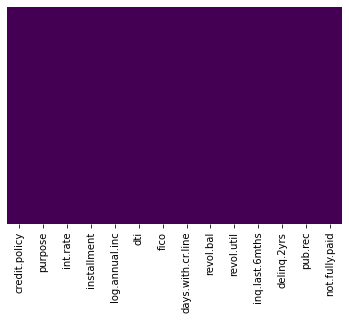

In [6]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap= 'viridis' )

In [7]:
lbl_encoder = LabelEncoder()
df['purpose'] = lbl_encoder.fit_transform(df['purpose'])
df['purpose'].head()

0    2
1    1
2    2
3    2
4    1
Name: purpose, dtype: int64

In [8]:
scaler = MinMaxScaler()
y = df['not.fully.paid']
df.drop('not.fully.paid', axis=1, inplace=True)
x = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
x

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1.0,0.333333,0.376598,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.000000,0.000000,0.0
1,1.0,0.166667,0.301151,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.000000,0.000000,0.0
2,1.0,0.333333,0.484015,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.030303,0.000000,0.0
3,1.0,0.333333,0.260870,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.030303,0.000000,0.0
4,1.0,0.166667,0.528133,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.000000,0.076923,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.0,0.000000,0.550512,0.355977,0.663709,0.346796,0.279070,0.589602,0.178383,0.689916,0.060606,0.000000,0.0
9574,0.0,0.000000,0.417519,0.261804,0.514888,0.007009,0.511628,0.240596,0.000152,0.009244,0.151515,0.000000,0.0
9575,0.0,0.333333,0.301151,0.088851,0.436785,0.436916,0.348837,0.187337,0.008312,0.696639,0.242424,0.000000,0.0
9576,0.0,0.666667,0.639386,0.363354,0.468750,0.640187,0.372093,0.092838,0.000000,0.026891,0.151515,0.000000,0.0


In [9]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

In [10]:
n_estimators = [10, 25, 50, 75, 100, 150, 200, 250]
n_estimators

[10, 25, 50, 75, 100, 150, 200, 250]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
rf_model = RandomForestClassifier()

In [12]:
gs_clf = GridSearchCV(rf_model, param_grid={'n_estimators' : n_estimators})

gs_clf.fit(x_train, y_train)
best_cv_err = 1 - gs_clf.best_score_
best_param_n_estimators = gs_clf.best_estimator_.n_estimators

In [13]:
print('RF-модель:')
print(f'Значение ошибки перекрестного контроля: {best_cv_err}')
print(f'Наилучшее значение n_estimators: {best_param_n_estimators}')

rf_model = RandomForestClassifier(n_estimators= best_param_n_estimators)
rf_model.fit(x_train, y_train)
err_train = np.mean(y_train != rf_model.predict(x_train))
err_test = np.mean(y_test != rf_model.predict(x_test))
print(f'Ошибка на обучающей выборке: {err_train}')
print(f'Ошибка на тестовой выборке: {err_test}')

y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

RF-модель:
Значение ошибки перекрестного контроля: 0.16124712010417708
Наилучшее значение n_estimators: 250
Ошибка на обучающей выборке: 0.0
Ошибка на тестовой выборке: 0.1590118302018093
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.67      0.01      0.03       460

    accuracy                           0.84      2874
   macro avg       0.75      0.51      0.47      2874
weighted avg       0.81      0.84      0.77      2874



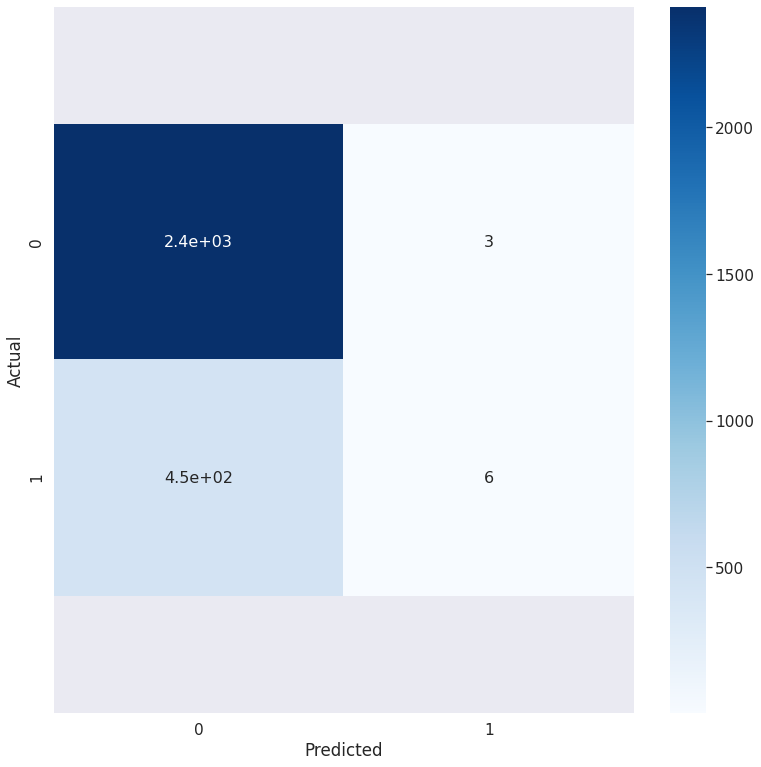

In [14]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index=np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize=(13,13))
sns.set(font_scale=1.4)
ax = sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={'size': 16})
i, k = ax.get_ylim()
ax = ax.set_ylim(i+0.5, k-0.5)